# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application
Coursebook: Python for Data Analysts

- Prepared by : Mohamad Gandhi Ardi Wibawanto
- Batch       : Vulcan DA Online

## background

US Dollar (USD) To Indonesian Rupiah (IDR) Exchange Rate History
Check out the USD to IDR history rates below. We will the US Dollar (USD) to Indonesian Rupiah (IDR) exchange rate history summary page with 180 days of USD to IDR rate historical data from November 11, 2022 to May 10, 2023)

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [1]:
import requests

url_get = requests.get('https://www.exchange-rates.org/exchange-rate-history/usd-idr')

To visualize what exactly you get from the `request.get`, we can use .content to see what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [2]:
url_get.content[1:500]

b'!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n<html class="no-js ie8 oldie" lang="en" xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" xml:lang=\'en\'><!--<![endif]-->\r\n<head>\r\n<title>USD to IDR exchange rate history</title>\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\r\n<meta charset="utf-8" /><meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\r\n<base href="http'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [4]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


In [5]:
print(soup.prettify()[:500])

<!DOCTYPE html>
<!--[if lt IE 9]>
<html class="no-js ie8 oldie" lang="en" xml:lang='en'>
<![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="en" xml:lang="en">
 <!--<![endif]-->
 <head>
  <title>
   USD to IDR exchange rate history
  </title>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1, maximum-scale=5" name="viewport"/>
  <meta charset="utf-8">
   <meta content="text/html; charset=utf-8" http-equiv="Content-Type">
   


## Finding the right key to scrap the data & Extracting the right information

<img src="asset/image1.jpg">


In the HTML address used, it is identified that the exchange rate data information code key to be retrieved is in the `tbody` section. Then it is used in the `find()` function to get all the information contained in the HTML `tbody`. Then use `find.all()` to explore other data for the repeating keyword.

In [379]:
table = soup.find('tbody')
print(table.prettify()[1:500])

tbody>
 <tr>
  <td>
   <a class="w" href="/exchange-rate-history/usd-idr-2023-05-10">
    May 10, 2023
   </a>
   <a class="n" href="/exchange-rate-history/usd-idr-2023-05-10">
    2023-5-10
   </a>
  </td>
  <td>
   <span class="w">
    <span class="nowrap">
     <span class="currencySymbol">
      $
     </span>
     1 =
    </span>
    <span class="nowrap">
     <span class="currencySymbol">
      Rp
     </span>
     14,698
    </span>
   </span>
   <span class="n">
    <span class="nowrap"


In [264]:
table.find_all('a', attrs={'class':'n'})[:5]

[<a class="n" href="/exchange-rate-history/usd-idr-2023-05-10">2023-5-10</a>,
 <a class="n" href="/exchange-rate-history/usd-idr-2023-05-09">2023-5-9</a>,
 <a class="n" href="/exchange-rate-history/usd-idr-2023-05-08">2023-5-8</a>,
 <a class="n" href="/exchange-rate-history/usd-idr-2023-05-05">2023-5-5</a>,
 <a class="n" href="/exchange-rate-history/usd-idr-2023-05-04">2023-5-4</a>]

In [271]:
table.find_all('a', attrs={'class':'n'})[3].text

'2023-5-5'

In [380]:
table.find_all('span', attrs={'class':'nowrap'})[:6]

[<span class="nowrap"><span class="currencySymbol">$</span>1 =</span>,
 <span class="nowrap"><span class="currencySymbol">Rp</span>14,698</span>,
 <span class="nowrap"><span class="currencySymbol">$</span>1 =</span>,
 <span class="nowrap"><span class="currencySymbol">Rp</span>14,698</span>,
 <span class="nowrap"><span class="currencySymbol">$</span>1 =</span>,
 <span class="nowrap"><span class="currencySymbol">Rp</span>14,776</span>]

In [280]:
table.find_all('span', attrs={'class':'nowrap'})[0].text

'$1 ='

In [281]:
table.find_all('span', attrs={'class':'nowrap'})[1].text

'Rp14,698'

In [285]:
row = table.find_all('a', attrs={'class':'n'})
row_length = len(row)
row_length

129

In [365]:
row_kurs = table.find_all('span', attrs={'class':'nowrap'})
row_length_kurs = len(row_kurs)
row_length_kurs

516

In the scrapping process, a loop function is used to retrieve the necessary data according to the keywords used, namely ('a', attrs={'class':'n'}) for date data and ('span', attrs={'class' :'nowrap'}) for exchange rate data. As can be seen in the previous code, the information structure of the exchange rate data, we will only retrieve the rupiah exchange rate data every 4 data jumps (index : 1, 5, 9, 13, etc., up to data 516). Use the lopping function to retrieve the required data as follows:

In [317]:
TransDate = [] #initiating a tuple
#scrapping process
#get date 
for i in range(0,row_length):  
    date = table.find_all('a', attrs={'class':'n'})[i].text
    
    TransDate.append((date))
TransDate

['2023-5-10',
 '2023-5-9',
 '2023-5-8',
 '2023-5-5',
 '2023-5-4',
 '2023-5-3',
 '2023-5-2',
 '2023-5-1',
 '2023-4-28',
 '2023-4-27',
 '2023-4-26',
 '2023-4-25',
 '2023-4-24',
 '2023-4-21',
 '2023-4-20',
 '2023-4-19',
 '2023-4-18',
 '2023-4-17',
 '2023-4-14',
 '2023-4-13',
 '2023-4-12',
 '2023-4-11',
 '2023-4-10',
 '2023-4-7',
 '2023-4-6',
 '2023-4-5',
 '2023-4-4',
 '2023-4-3',
 '2023-3-31',
 '2023-3-30',
 '2023-3-29',
 '2023-3-28',
 '2023-3-27',
 '2023-3-24',
 '2023-3-23',
 '2023-3-22',
 '2023-3-21',
 '2023-3-20',
 '2023-3-17',
 '2023-3-16',
 '2023-3-15',
 '2023-3-14',
 '2023-3-13',
 '2023-3-10',
 '2023-3-9',
 '2023-3-8',
 '2023-3-7',
 '2023-3-6',
 '2023-3-3',
 '2023-3-2',
 '2023-3-1',
 '2023-2-28',
 '2023-2-27',
 '2023-2-24',
 '2023-2-23',
 '2023-2-22',
 '2023-2-21',
 '2023-2-20',
 '2023-2-17',
 '2023-2-16',
 '2023-2-15',
 '2023-2-14',
 '2023-2-13',
 '2023-2-10',
 '2023-2-9',
 '2023-2-8',
 '2023-2-7',
 '2023-2-6',
 '2023-2-3',
 '2023-2-2',
 '2023-2-1',
 '2023-1-31',
 '2023-1-30',
 '20

In [366]:
USDtoIDR = []

for i in range(1,row_length_kurs,4):
    kurs_Rp = table.find_all('span', attrs={'class':'nowrap'})[i].text

    USDtoIDR.append((kurs_Rp))
USDtoIDR     

['Rp14,698',
 'Rp14,776',
 'Rp14,744',
 'Rp14,675',
 'Rp14,699',
 'Rp14,680',
 'Rp14,747',
 'Rp14,677',
 'Rp14,674',
 'Rp14,691',
 'Rp14,841',
 'Rp14,940',
 'Rp14,934',
 'Rp14,936',
 'Rp14,954',
 'Rp14,995',
 'Rp14,889',
 'Rp14,850',
 'Rp14,782',
 'Rp14,722',
 'Rp14,835',
 'Rp14,915',
 'Rp14,950',
 'Rp14,941',
 'Rp14,931',
 'Rp14,960',
 'Rp14,957',
 'Rp14,922',
 'Rp14,969',
 'Rp15,024',
 'Rp15,034',
 'Rp15,060',
 'Rp15,107',
 'Rp15,165',
 'Rp15,085',
 'Rp15,253',
 'Rp15,301',
 'Rp15,343',
 'Rp15,375',
 'Rp15,429',
 'Rp15,459',
 'Rp15,380',
 'Rp15,416',
 'Rp15,503',
 'Rp15,495',
 'Rp15,449',
 'Rp15,429',
 'Rp15,354',
 'Rp15,278',
 'Rp15,322',
 'Rp15,249',
 'Rp15,241',
 'Rp15,216',
 'Rp15,265',
 'Rp15,211',
 'Rp15,197',
 'Rp15,235',
 'Rp15,168',
 'Rp15,166',
 'Rp15,144',
 'Rp15,205',
 'Rp15,186',
 'Rp15,216',
 'Rp15,188',
 'Rp15,147',
 'Rp15,133',
 'Rp15,154',
 'Rp15,198',
 'Rp15,095',
 'Rp14,907',
 'Rp14,896',
 'Rp15,002',
 'Rp15,013',
 'Rp14,973',
 'Rp14,955',
 'Rp14,940',
 'Rp14,956',


Then we combine the `TransDate` and `USDtoIDR` data to form a list of data using the `list(zip(__,__))` function so that they can be converted to one dataframe.

In [367]:
Exchange = list(zip(TransDate, USDtoIDR))
Exchange

[('2023-5-10', 'Rp14,698'),
 ('2023-5-9', 'Rp14,776'),
 ('2023-5-8', 'Rp14,744'),
 ('2023-5-5', 'Rp14,675'),
 ('2023-5-4', 'Rp14,699'),
 ('2023-5-3', 'Rp14,680'),
 ('2023-5-2', 'Rp14,747'),
 ('2023-5-1', 'Rp14,677'),
 ('2023-4-28', 'Rp14,674'),
 ('2023-4-27', 'Rp14,691'),
 ('2023-4-26', 'Rp14,841'),
 ('2023-4-25', 'Rp14,940'),
 ('2023-4-24', 'Rp14,934'),
 ('2023-4-21', 'Rp14,936'),
 ('2023-4-20', 'Rp14,954'),
 ('2023-4-19', 'Rp14,995'),
 ('2023-4-18', 'Rp14,889'),
 ('2023-4-17', 'Rp14,850'),
 ('2023-4-14', 'Rp14,782'),
 ('2023-4-13', 'Rp14,722'),
 ('2023-4-12', 'Rp14,835'),
 ('2023-4-11', 'Rp14,915'),
 ('2023-4-10', 'Rp14,950'),
 ('2023-4-7', 'Rp14,941'),
 ('2023-4-6', 'Rp14,931'),
 ('2023-4-5', 'Rp14,960'),
 ('2023-4-4', 'Rp14,957'),
 ('2023-4-3', 'Rp14,922'),
 ('2023-3-31', 'Rp14,969'),
 ('2023-3-30', 'Rp15,024'),
 ('2023-3-29', 'Rp15,034'),
 ('2023-3-28', 'Rp15,060'),
 ('2023-3-27', 'Rp15,107'),
 ('2023-3-24', 'Rp15,165'),
 ('2023-3-23', 'Rp15,085'),
 ('2023-3-22', 'Rp15,253'),
 ('2

To do a further analysis let's reverse our list we can use `::-1` to do that, because the original webpage give us reversed information.

In [368]:
Exchange=Exchange[::-1]
Exchange[:10]

[('2022-11-11', 'Rp15,474'),
 ('2022-11-14', 'Rp15,554'),
 ('2022-11-15', 'Rp15,557'),
 ('2022-11-16', 'Rp15,639'),
 ('2022-11-17', 'Rp15,714'),
 ('2022-11-18', 'Rp15,641'),
 ('2022-11-21', 'Rp15,741'),
 ('2022-11-22', 'Rp15,664'),
 ('2022-11-23', 'Rp15,626'),
 ('2022-11-24', 'Rp15,647')]

## Creating data frame & Data wrangling

Put the array into dataframe

In [369]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
df = pd.DataFrame(Exchange,columns=('Date','USDtoIDR'))
df.head()

,Date,USDtoIDR
0,2022-11-11,"Rp15,474"
1,2022-11-14,"Rp15,554"
2,2022-11-15,"Rp15,557"
3,2022-11-16,"Rp15,639"
4,2022-11-17,"Rp15,714"



The data that is formed from the conversion of the list to the dataframe has a data type object, so it is necessary to change the appropriate data type and clean up unused strings.

In [370]:
df.dtypes

Date        object
USDtoIDR    object
dtype: object

In [371]:
df['USDtoIDR']=df['USDtoIDR'].str.replace('Rp','')

In [372]:
df['USDtoIDR']=df['USDtoIDR'].str.replace(',','')
df

,Date,USDtoIDR
0,2022-11-11,15474
1,2022-11-14,15554
2,2022-11-15,15557
3,2022-11-16,15639
4,2022-11-17,15714
...,...,...
124,2023-5-4,14699
125,2023-5-5,14675
126,2023-5-8,14744
127,2023-5-9,14776


In [373]:
df['USDtoIDR'] = df['USDtoIDR'].astype('int64')
df['Date'] = df['Date'].astype('datetime64[ns]')

df.dtypes

Date        datetime64[ns]
USDtoIDR             int64
dtype: object


In the visualization process, it is necessary to set `Date` to be an index so that it is not read as data for graphing.

In [374]:
df = df.set_index('Date')

<Axes: title={'center': 'US Dollar (USD) To Indonesian Rupiah (IDR) Exchange Rate History'}, xlabel='Date', ylabel='Rate (Rp)'>

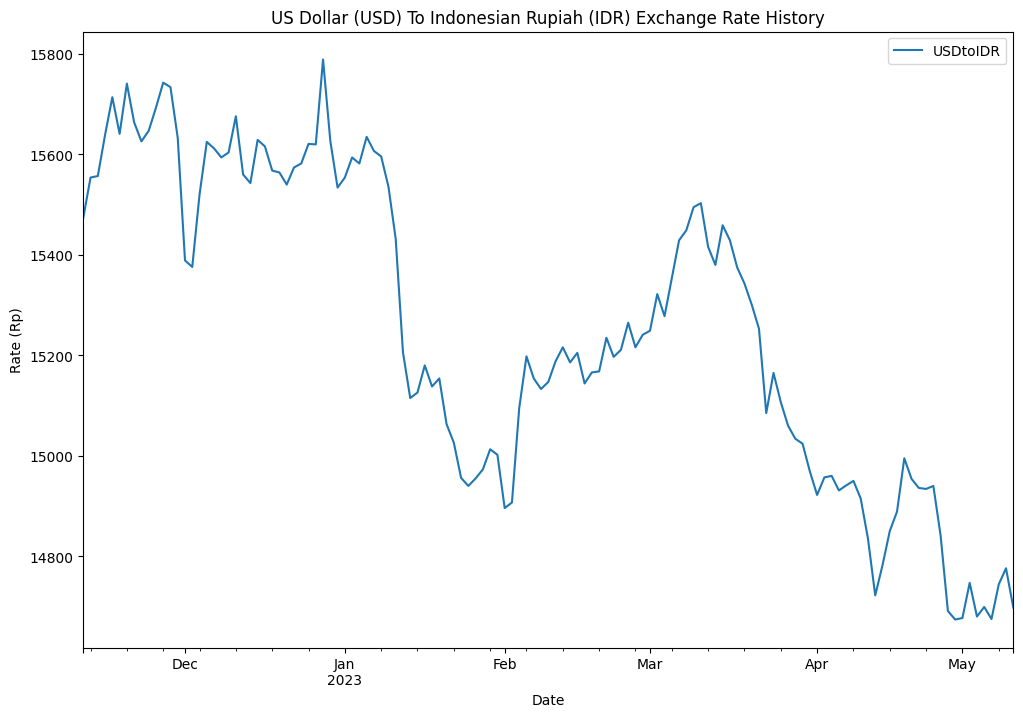

In [378]:
df.plot(title='US Dollar (USD) To Indonesian Rupiah (IDR) Exchange Rate History',
               xlabel='Date',
               ylabel='Rate (Rp)',
               figsize=(12,8)
       )

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

This chart shows data from 2022-11-11 to 2023-5-10.
- The USD/IDR rate is down -5.00% in the six months. This means the US Dollar has decreased in value compared to the Indonesian Rupiah.
- Highest:	15,789 IDR on December 28, 2022
- Average:	15,244 IDR over this period
- Lowest :	14,674 IDR on April 28, 2023

### Implement it at the webapps

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.